In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [ ]:
np.random.seed(0)
dates =pd.date_range(start='2022-01-01', end='2022-12-31')
values = np.arange(len(dates))*.2+np.random.randn(len(dates))*50
ts=pd.Series(data=values, index=dates)

<function matplotlib.pyplot.show(close=None, block=None)>

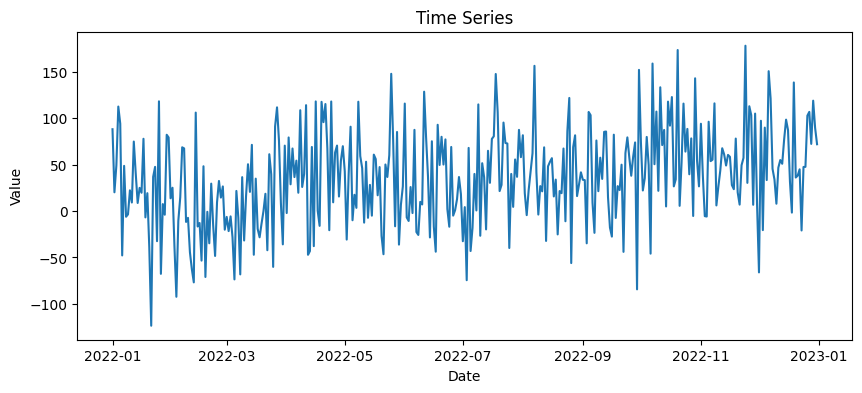

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(ts)
plt.title('Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show

In [ ]:
decomposition = seasonal_decompose(ts, model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

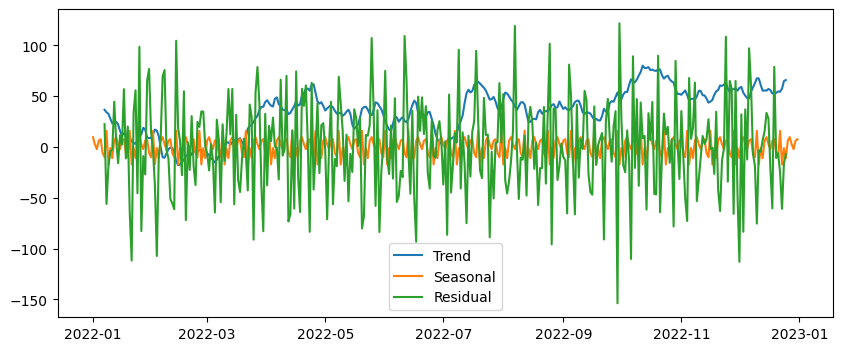

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(trend, label='Trend')
plt.plot(seasonal, label='Seasonal')
plt.plot(residual, label='Residual')
plt.legend()
plt.show()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [11]:
df=pd.read_csv('Rabia_2.csv')

In [12]:
print(df.head())

   Aos (FECHA INICIO ENFERMEDAD) Meses (FECHA INICIO ENFERMEDAD)  Total
0                           2010                             ene     16
1                           2010                             feb     11
2                           2010                             mar     10
3                           2010                             abr     15
4                           2010                             may     12


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Aos (FECHA INICIO ENFERMEDAD)    120 non-null    int64 
 1   Meses (FECHA INICIO ENFERMEDAD)  120 non-null    object
 2   Total                            120 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.9+ KB


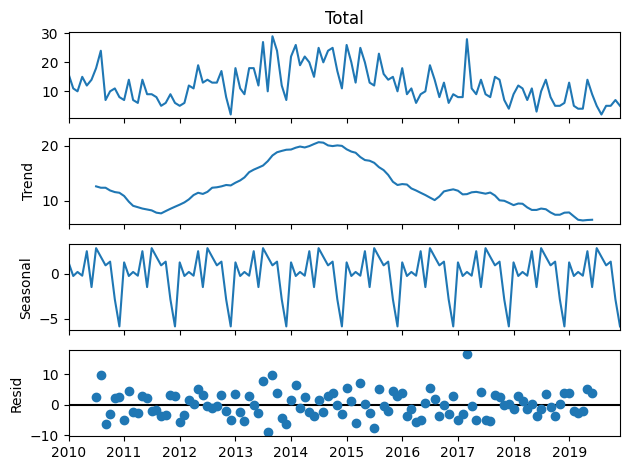

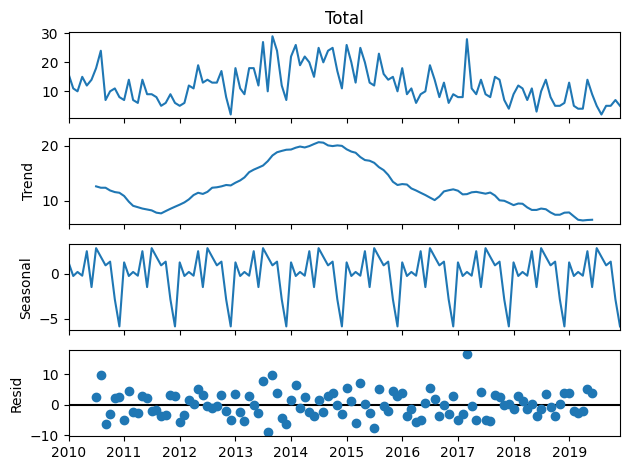

In [14]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Crear un diccionario para mapear los nombres de los meses en español a números
meses_espanol = {
    'ene': '01', 'feb': '02', 'mar': '03', 'abr': '04', 'may': '05',
    'jun': '06', 'jul': '07', 'ago': '08', 'sep': '09', 'oct': '10',
    'nov': '11', 'dic': '12'
}

# Reemplazar los nombres de los meses por los números correspondientes
df['Meses (FECHA INICIO ENFERMEDAD)'] = df['Meses (FECHA INICIO ENFERMEDAD)'].map(meses_espanol)

# Crear la columna de fecha combinando año y mes
df['Fecha'] = pd.to_datetime(df['Aos (FECHA INICIO ENFERMEDAD)'].astype(str) + '-' + df['Meses (FECHA INICIO ENFERMEDAD)'], format='%Y-%m')

# Configurar la columna de fecha como índice
df.set_index('Fecha', inplace=True)

# Convertir la columna 'Total' en una serie temporal
ts = df['Total']

# Realizar la descomposición estacional
decomposition = seasonal_decompose(ts, model='additive', period=12)

# Extraer la tendencia, estacionalidad y residuales
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Si deseas, puedes visualizar los componentes
decomposition.plot()


In [15]:
print(df)

            Aos (FECHA INICIO ENFERMEDAD) Meses (FECHA INICIO ENFERMEDAD)  Total
Fecha                                                                           
2010-01-01                           2010                              01     16
2010-02-01                           2010                              02     11
2010-03-01                           2010                              03     10
2010-04-01                           2010                              04     15
2010-05-01                           2010                              05     12
...                                   ...                             ...    ...
2019-08-01                           2019                              08      2
2019-09-01                           2019                              09      5
2019-10-01                           2019                              10      5
2019-11-01                           2019                              11      7
2019-12-01                  

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [ ]:
np.random.seed(0)
dates=pd.date_range(start='2022-01-01', end='2022-12-31')
values=np.arange(len(dates))*.2+np.random.randn(len(dates))*50
ts=pd.Series(data=values, index=dates)


In [ ]:
train_data=ts[:'2022-10-01']
test_data=ts['2022-10-02':]

In [ ]:
model =ARIMA(train_data, order=(10, 1, 10))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
forecast=model_fit.forecast(steps=len(test_data))


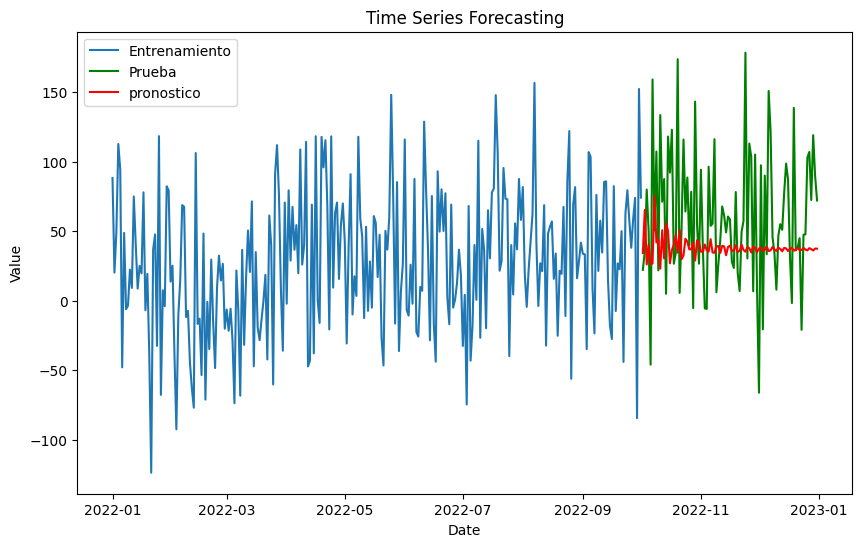

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(train_data, label='Entrenamiento')
plt.plot(test_data, label='Prueba', color ='green')
plt.plot(forecast, label='pronostico',color='red')
plt.legend()
plt.title('Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA



In [9]:
train_data, test_data=train_test_split(ts, test_size=0.2, shuffle=False)

NameError: name 'train_test_split' is not defined

In [ ]:
model= ARIMA(train_data, order=(10,1,10))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

In [ ]:
forecast=model_fit.forecast(steps=len(test_data))

In [ ]:
mae= mean_absolute_error(test_data, forecast)

In [ ]:
print('MAE',mae)

MAE 3.7657331298571433


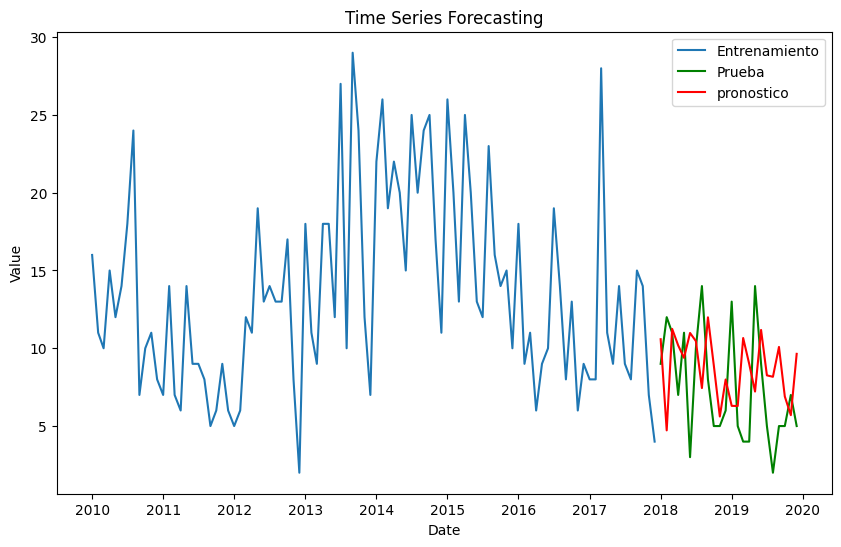

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(train_data, label='Entrenamiento')
plt.plot(test_data, label='Prueba', color ='green')
plt.plot(forecast, label='pronostico',color='red')
plt.legend()
plt.title('Series de tiempo rabia de origen animal')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calcular la suma de la tendencia y la estacionalidad
reconstructed_ts = trend + seasonal

# Calcular el error residual (diferencia entre la serie original y la reconstrucción)
residual_error = ts - reconstructed_ts

# Calcular el MSE (Error Cuadrático Medio)
mse = mean_squared_error(ts[~np.isnan(residual)], reconstructed_ts[~np.isnan(residual)])

# Calcular el MAE (Error Absoluto Medio)
mae = mean_absolute_error(ts[~np.isnan(residual)], reconstructed_ts[~np.isnan(residual)])

# Calcular el RMSE (Raíz del Error Cuadrático Medio)
rmse = np.sqrt(mse)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


MSE: 17.266147143156534
MAE: 3.3533521947873797
RMSE: 4.155255364373715


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from keras.models import Sequential
from keras.layers import LSTM, Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler

In [ ]:
time_series=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
print("time series")
print(time_series)

time series
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [ ]:
train_size=int(len(time_series)*0.7)
train_data, test_data=time_series[:train_size], time_series[train_size:]
print("train data")
print(train_data)
print("test data")
print(test_data)

train data
[ 1  2  3  4  5  6  7  8  9 10]
test data
[11 12 13 14 15]


In [ ]:
def create_dataset(data, look_back=1):
    X, y=[],[]
    for i in range(len(data)-seq_lenght):
      X.append(data[i:i+seq_lenght])
      y.append(data[i+seq_lenght])
    return np.array(X), np.array(y)


In [ ]:
seq_lenght=4
X_train, y_train = create_dataset(train_data, seq_lenght)
X_test, y_test = create_dataset(test_data, seq_lenght)

In [ ]:
print("X_train")
print(X_train)
print("y_train")
print(y_train)

X_train
[[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]
 [5 6 7 8]
 [6 7 8 9]]
y_train
[ 5  6  7  8  9 10]


In [ ]:
model = Sequential()
model.add(SimpleRNN(16, activation='relu', input_shape=(seq_lenght, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5.3188
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.4047  
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3918 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2747 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7468 
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1209 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1583 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2067 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2867 
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1359 
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2188 
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1722 
Epoch 13/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1862 
Epoch 14/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1229     
Epoch 15/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2257 
Epoch 16/100
6/

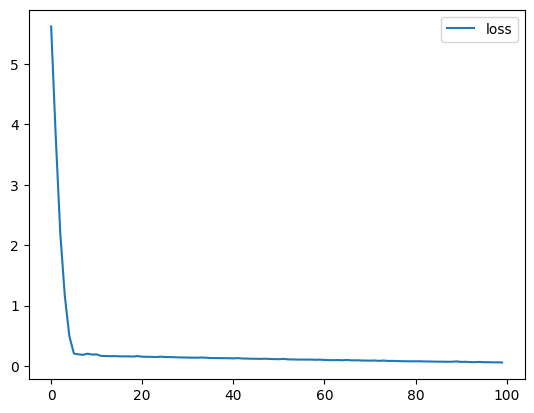

In [ ]:
pd.DataFrame(history.history).plot()
plt.show()

In [ ]:
Evaluacion = model.evaluate(X_test, y_test)
print("MSE: ", Evaluacion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.8387
MSE:  0.838667094707489


In [ ]:
print("X_test")
print(X_test)
print("y_test")
print(y_test)
y_pred = model.predict(X_test)
print("y_pred")
print(y_pred)

X_test
[[11 12 13 14]]
y_test
[15]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
y_pred
[[15.915788]]


In [ ]:
model = Sequential()
model.add(LSTM(16, activation='relu', input_shape=(seq_lenght, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 57.3842
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 59.2162 
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 50.0347 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 37.7063 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38.6020 
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 32.1704 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31.3845 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25.9059  
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.9669 
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.8724 
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.4487  
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6107  
Epoch 13/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1043 
Epoch 14/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4430 
Epoch 15/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.6164 
Epoch 1

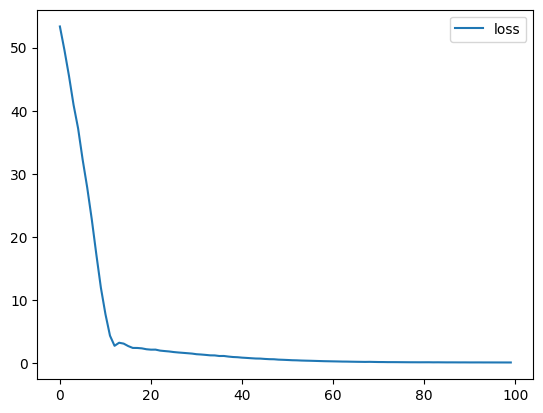

In [ ]:
pd.DataFrame(history.history).plot()
plt.show()

In [ ]:
print("X_test")
print(X_test)
print("y_test")
print(y_test)
y_pred = model.predict(X_test)
print("y_pred")
print(y_pred)

X_test
[[11 12 13 14]]
y_test
[15]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
y_pred
[[12.381342]]


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(32, activation='relu', input_shape=(seq_lenght, 1), return_sequences=True))  # Devuelve secuencias
#model.add(LSTM(16, activation='relu'))  # No es necesario return_sequences en la última LSTM
#model.add(Dropout(0.25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 63.6302
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 51.1419 
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 64.3291  
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 63.5905 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 55.7538 
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 49.0692 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 42.2016 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35.1607 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35.2271 
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29.6775 
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25.9657  
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25.6468  
Epoch 13/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28.5886 
Epoch 14/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22.8392 
Epoch 15/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.7420  
E

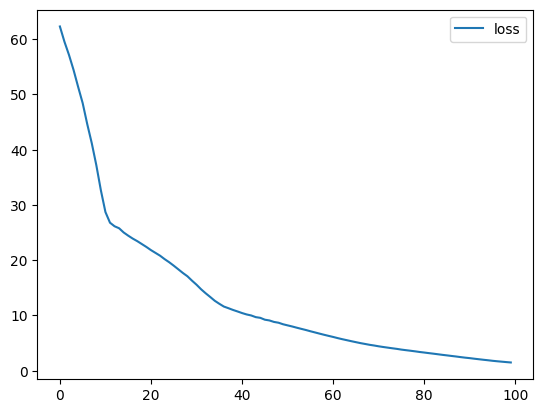

In [ ]:
pd.DataFrame(history.history).plot()
plt.show()

In [ ]:
print("X_test")
print(X_test)
print("y_test")
print(y_test)
y_pred = model.predict(X_test)
print("y_pred")
print(y_pred)

X_test
[[11 12 13 14]]
y_test
[15]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
y_pred
[[[17.537598]
  [13.872769]
  [16.724205]
  [15.556881]]]


In [18]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [19]:
train_data, test_data=train_test_split(ts, test_size=0.2, shuffle=False)

In [21]:
print(train_data)

Fecha
2010-01-01    16
2010-02-01    11
2010-03-01    10
2010-04-01    15
2010-05-01    12
              ..
2017-08-01     8
2017-09-01    15
2017-10-01    14
2017-11-01     7
2017-12-01     4
Name: Total, Length: 96, dtype: int64


In [22]:
print(test_data)

Fecha
2018-01-01     9
2018-02-01    12
2018-03-01    11
2018-04-01     7
2018-05-01    11
2018-06-01     3
2018-07-01    10
2018-08-01    14
2018-09-01     8
2018-10-01     5
2018-11-01     5
2018-12-01     6
2019-01-01    13
2019-02-01     5
2019-03-01     4
2019-04-01     4
2019-05-01    14
2019-06-01     9
2019-07-01     5
2019-08-01     2
2019-09-01     5
2019-10-01     5
2019-11-01     7
2019-12-01     5
Name: Total, dtype: int64


In [66]:
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 5

X_train, y_train = create_dataset(train_data, seq_length)
X_test, y_test = create_dataset(test_data, seq_length)
#

<ipython-input-66-c3e829d5b935>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(data[i+seq_length])


In [67]:
print("X_train")
print(X_train)
print("y_train")
print(y_train)
print("X_test")
print(X_test)
print("y_test")
print(y_test)

X_train
[[16 11 10 15 12]
 [11 10 15 12 14]
 [10 15 12 14 18]
 [15 12 14 18 24]
 [12 14 18 24  7]
 [14 18 24  7 10]
 [18 24  7 10 11]
 [24  7 10 11  8]
 [ 7 10 11  8  7]
 [10 11  8  7 14]
 [11  8  7 14  7]
 [ 8  7 14  7  6]
 [ 7 14  7  6 14]
 [14  7  6 14  9]
 [ 7  6 14  9  9]
 [ 6 14  9  9  8]
 [14  9  9  8  5]
 [ 9  9  8  5  6]
 [ 9  8  5  6  9]
 [ 8  5  6  9  6]
 [ 5  6  9  6  5]
 [ 6  9  6  5  6]
 [ 9  6  5  6 12]
 [ 6  5  6 12 11]
 [ 5  6 12 11 19]
 [ 6 12 11 19 13]
 [12 11 19 13 14]
 [11 19 13 14 13]
 [19 13 14 13 13]
 [13 14 13 13 17]
 [14 13 13 17  8]
 [13 13 17  8  2]
 [13 17  8  2 18]
 [17  8  2 18 11]
 [ 8  2 18 11  9]
 [ 2 18 11  9 18]
 [18 11  9 18 18]
 [11  9 18 18 12]
 [ 9 18 18 12 27]
 [18 18 12 27 10]
 [18 12 27 10 29]
 [12 27 10 29 24]
 [27 10 29 24 12]
 [10 29 24 12  7]
 [29 24 12  7 22]
 [24 12  7 22 26]
 [12  7 22 26 19]
 [ 7 22 26 19 22]
 [22 26 19 22 20]
 [26 19 22 20 15]
 [19 22 20 15 25]
 [22 20 15 25 20]
 [20 15 25 20 24]
 [15 25 20 24 25]
 [25 20 24 25 17]
 [

In [68]:
model = Sequential()
model.add(LSTM(16, activation='relu', input_shape=(seq_length, 1), return_sequences=True))
model.add(Dropout(0.25))
model.add(LSTM(16, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [69]:
from keras.callbacks import EarlyStopping

# Configurar el Early Stopping
early_stopping = EarlyStopping(monitor='val_loss',  # Métrica a monitorizar
                               patience=10,         # Número de épocas sin mejora para detener el entrenamiento
                               verbose=1,           # Nivel de detalle durante el entrenamiento
                               restore_best_weights=True)  # Restaurar los mejores pesos al final del entrenamiento


In [70]:
model.fit(X_train, y_train, epochs=500, batch_size=1, verbose=1, callbacks=[early_stopping])

Epoch 1/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 225.5739
Epoch 2/500
38/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 55.3352

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 63.7548
Epoch 3/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 65.8373
Epoch 4/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 69.9073
Epoch 5/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 65.0161
Epoch 6/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 59.5464
Epoch 7/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 51.5038
Epoch 8/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 65.1059
Epoch 9/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 43.0764
Epoch 10/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 57.7232
Epoch 11/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 41.0281
Epoch 12/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 40.5450
Epoch 13/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 50.2634
Epoch 14/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 41.9706
Epoch 15/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 56.5208
Epoch 16/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 52.2449


In [71]:
Evaluacion = model.evaluate(X_test, y_test)
print("MSE: ", Evaluacion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - loss: 44.8055
MSE:  44.805538177490234


In [72]:
print("X_test")
print(X_test)
print("y_test")
print(y_test)
y_pred = model.predict(X_test)
print("y_pred")
print(y_pred)

X_test
[[ 9 12 11  7 11]
 [12 11  7 11  3]
 [11  7 11  3 10]
 [ 7 11  3 10 14]
 [11  3 10 14  8]
 [ 3 10 14  8  5]
 [10 14  8  5  5]
 [14  8  5  5  6]
 [ 8  5  5  6 13]
 [ 5  5  6 13  5]
 [ 5  6 13  5  4]
 [ 6 13  5  4  4]
 [13  5  4  4 14]
 [ 5  4  4 14  9]
 [ 4  4 14  9  5]
 [ 4 14  9  5  2]
 [14  9  5  2  5]
 [ 9  5  2  5  5]
 [ 5  2  5  5  7]]
y_test
[ 3 10 14  8  5  5  6 13  5  4  4 14  9  5  2  5  5  7  5]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
y_pred
[[ 7.8715534]
 [ 6.2122455]
 [ 9.279475 ]
 [ 9.681971 ]
 [20.87385  ]
 [10.4436   ]
 [ 8.268194 ]
 [ 7.4611177]
 [12.03504  ]
 [ 6.0016403]
 [13.605492 ]
 [ 9.463411 ]
 [ 9.461197 ]
 [11.969643 ]
 [12.78706  ]
 [ 9.0612755]
 [ 7.497915 ]
 [ 8.561085 ]
 [15.677717 ]]


In [73]:
Evalucion = model.evaluate(X_test, y_test)
print("MSE: ", Evaluacion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 44.8055
MSE:  44.805538177490234


In [74]:
print(y_test)
y_pred = model.predict(X_test)
print(y_pred)

[ 3 10 14  8  5  5  6 13  5  4  4 14  9  5  2  5  5  7  5]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[ 7.8715534]
 [ 6.2122455]
 [ 9.279475 ]
 [ 9.681971 ]
 [20.87385  ]
 [10.4436   ]
 [ 8.268194 ]
 [ 7.4611177]
 [12.03504  ]
 [ 6.0016403]
 [13.605492 ]
 [ 9.463411 ]
 [ 9.461197 ]
 [11.969643 ]
 [12.78706  ]
 [ 9.0612755]
 [ 7.497915 ]
 [ 8.561085 ]
 [15.677717 ]]


Text(0.5, 0, 'Date')

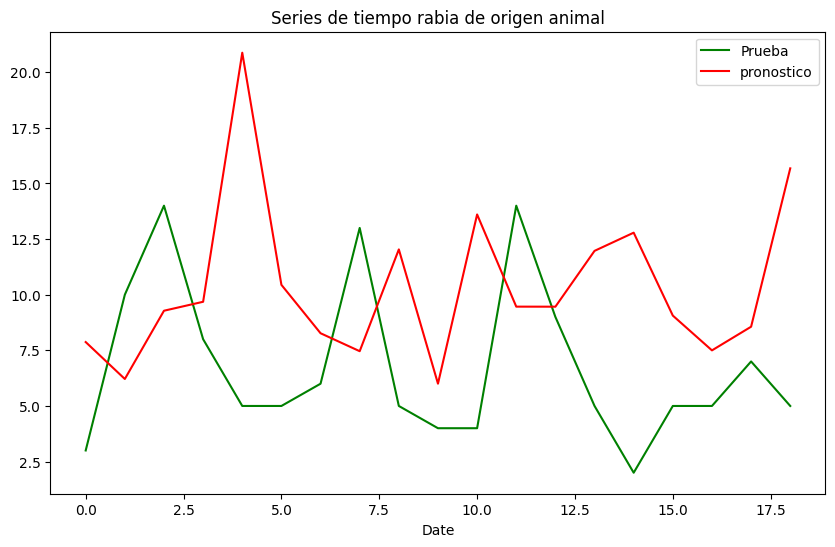

In [75]:
plt.figure(figsize=(10,6))
plt.plot(y_test, label='Prueba', color ='green')
plt.plot(y_pred, label='pronostico',color='red')
plt.legend()
plt.title('Series de tiempo rabia de origen animal')
plt.xlabel('Date')

In [83]:
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)


Forma de X_train: (91, 5)
Forma de X_test: (19, 5)


In [90]:
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back])
        y.append(data[i + look_back])
    return np.array(X), np.array(y)

# Ajusta los datos para que tengan la forma correcta
seq_length = 3
X_train, y_train = create_dataset(train_data, seq_length)
X_test, y_test = create_dataset(test_data, seq_length)

# Redimensionar para LSTM (n_samples, timesteps, n_features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


<ipython-input-90-1a8023956b5f>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(data[i + look_back])


Forma de X_train: (93, 3, 1)
Forma de X_test: (21, 3, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 22: early stopping
Restoring model weights from the end of the best epoch: 12.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 39: early stopping
Restoring model weights from the end of the best epoch: 29.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 31: early stopping
Restoring model weights from the end of the best epoch: 21.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 21: early stopping
Restoring model weights from the end of the best epoch: 11.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 47: early stopping
Restoring model weights from the end of the best epoch: 37.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 32: early stopping
Restoring model weights from the end of the best epoch: 22.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 42: early stopping
Restoring model weights from the end of the best epoch: 32.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 37: early stopping
Restoring model weights from the end of the best epoch: 27.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 40: early stopping
Restoring model weights from the end of the best epoch: 30.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 24: early stopping
Restoring model weights from the end of the best epoch: 14.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 40: early stopping
Restoring model weights from the end of the best epoch: 30.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 21: early stopping
Restoring model weights from the end of the best epoch: 11.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 19: early stopping
Restoring model weights from the end of the best epoch: 9.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 34: early stopping
Restoring model weights from the end of the best epoch: 24.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 38: early stopping
Restoring model weights from the end of the best epoch: 28.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 48: early stopping
Restoring model weights from the end of the best epoch: 38.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
Mejor configuración: {'units': 16, 'dropout_rate': 0.5, 'batch_size': 1, 'epochs': 200}
MSE en datos de prueba: 15.511300391702228
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - loss: 15.5113
Mejor modelo - Pérdida en test: 15.51130199432373
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


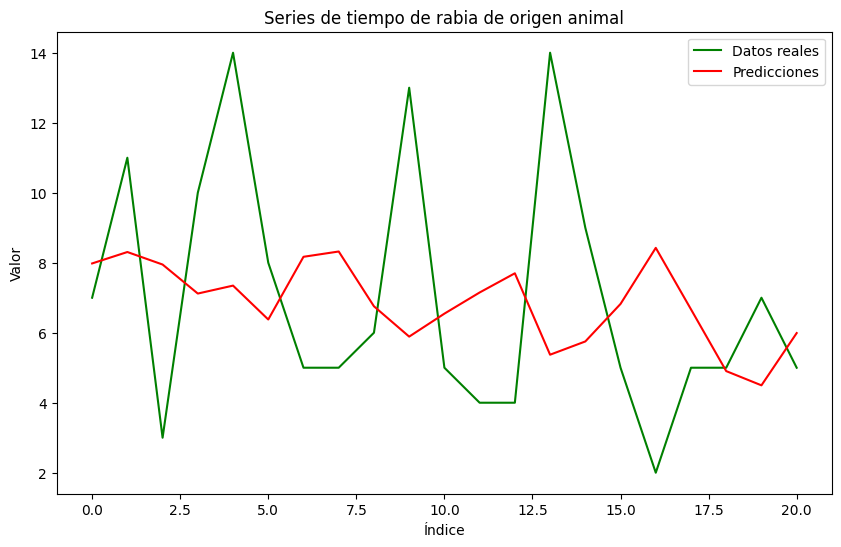

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

# Función para crear y entrenar el modelo
def create_and_train_model(X_train, y_train, X_test, y_test,
                           units=16, dropout_rate=0.25,
                           epochs=100, batch_size=1):
    # Crear el modelo
    model = Sequential()
    model.add(LSTM(units, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Configurar Early Stopping
    early_stopping = EarlyStopping(monitor='loss',  # Usa 'loss' ya que no hay validación
                                   patience=10,
                                   verbose=1,
                                   restore_best_weights=True)

    # Entrenar el modelo
    model.fit(X_train, y_train,
              epochs=epochs,
              batch_size=batch_size,
              verbose=0,
              callbacks=[early_stopping])

    # Evaluar el modelo en los datos de prueba
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    return mse, model

# Verifica la forma de los datos
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)

# Listas de configuraciones a probar
units_list = [16, 32]
dropout_list = [0.25, 0.5]
batch_size_list = [1, 2]
epochs_list = [100, 200]

# Almacenar los resultados
best_mse = float('inf')
best_model = None
best_config = {}

# Iterar sobre las configuraciones
for units in units_list:
    for dropout_rate in dropout_list:
        for batch_size in batch_size_list:
            for epochs in epochs_list:
                mse, model = create_and_train_model(X_train, y_train, X_test, y_test,
                                                    units=units, dropout_rate=dropout_rate,
                                                    epochs=epochs, batch_size=batch_size)

                # Comparar MSE y guardar la mejor configuración
                if mse < best_mse:
                    best_mse = mse
                    best_model = model
                    best_config = {
                        'units': units,
                        'dropout_rate': dropout_rate,
                        'batch_size': batch_size,
                        'epochs': epochs
                    }

print(f"Mejor configuración: {best_config}")
print(f"MSE en datos de prueba: {best_mse}")

# Evaluar el mejor modelo
test_loss = best_model.evaluate(X_test, y_test)
print(f"Mejor modelo - Pérdida en test: {test_loss}")

# Generar predicciones con el mejor modelo
y_pred = best_model.predict(X_test)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Datos reales', color='green')
plt.plot(y_pred, label='Predicciones', color='red')
plt.legend()
plt.title('Series de tiempo de rabia de origen animal')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 9.5277
Mejor modelo - Pérdida en test: 9.527658462524414
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


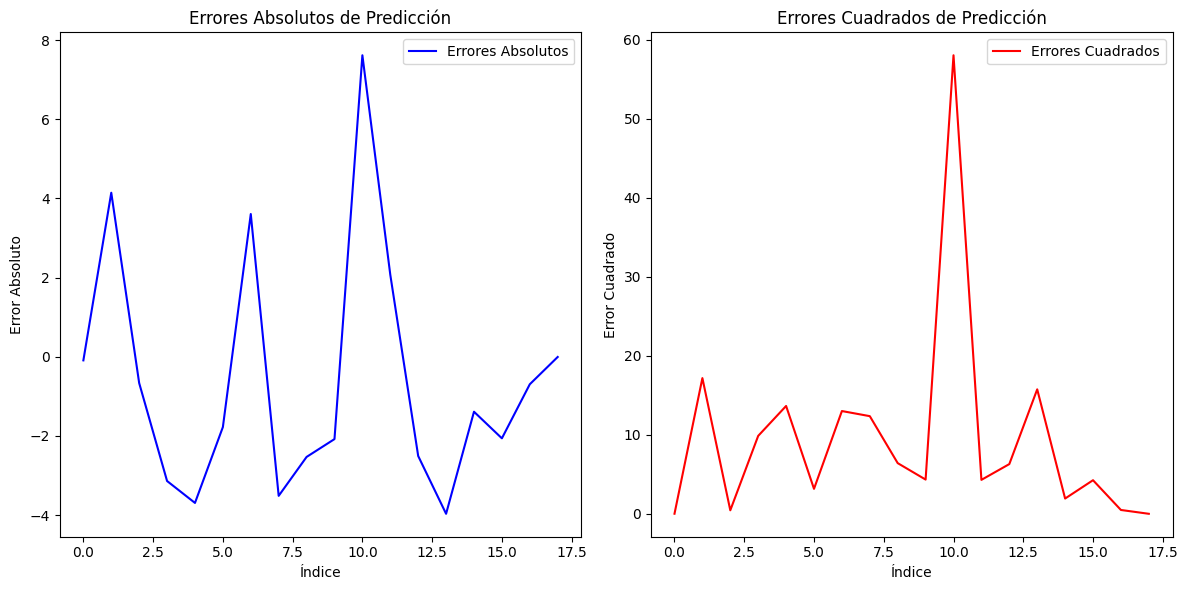

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Evaluar el mejor modelo
test_loss = best_model.evaluate(X_test, y_test)
print(f"Mejor modelo - Pérdida en test: {test_loss}")

# Generar predicciones con el mejor modelo
y_pred = best_model.predict(X_test)

# Calcular los errores
errors = y_test.flatten() - y_pred.flatten()  # Errores absolutos
squared_errors = errors ** 2  # Errores cuadrados

# Graficar los errores
plt.figure(figsize=(12, 6))

# Error absoluto
plt.subplot(1, 2, 1)
plt.plot(errors, label='Errores Absolutos', color='blue')
plt.xlabel('Índice')
plt.ylabel('Error Absoluto')
plt.title('Errores Absolutos de Predicción')
plt.legend()

# Error cuadrado
plt.subplot(1, 2, 2)
plt.plot(squared_errors, label='Errores Cuadrados', color='red')
plt.xlabel('Índice')
plt.ylabel('Error Cuadrado')
plt.title('Errores Cuadrados de Predicción')
plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 50: early stopping
Restoring model weights from the end of the best epoch: 40.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 33: early stopping
Restoring model weights from the end of the best epoch: 23.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 26: early stopping
Restoring model weights from the end of the best epoch: 16.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 13: early stopping
Restoring model weights from the end of the best epoch: 3.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 33: early stopping
Restoring model weights from the end of the best epoch: 23.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 36: early stopping
Restoring model weights from the end of the best epoch: 26.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 38: early stopping
Restoring model weights from the end of the best epoch: 28.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 40: early stopping
Restoring model weights from the end of the best epoch: 30.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 30: early stopping
Restoring model weights from the end of the best epoch: 20.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 25: early stopping
Restoring model weights from the end of the best epoch: 15.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 24: early stopping
Restoring model weights from the end of the best epoch: 14.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 39: early stopping
Restoring model weights from the end of the best epoch: 29.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 48: early stopping
Restoring model weights from the end of the best epoch: 38.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 40: early stopping
Restoring model weights from the end of the best epoch: 30.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 41: early stopping
Restoring model weights from the end of the best epoch: 31.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 27: early stopping
Restoring model weights from the end of the best epoch: 17.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Mejor configuración: {'units': 32, 'dropout_rate': 0.5, 'batch_size': 1, 'epochs': 100}
MSE en datos de prueba: 16.206997088443057
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - loss: 16.2070
Mejor modelo - Pérdida en test: 16.20699691772461
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


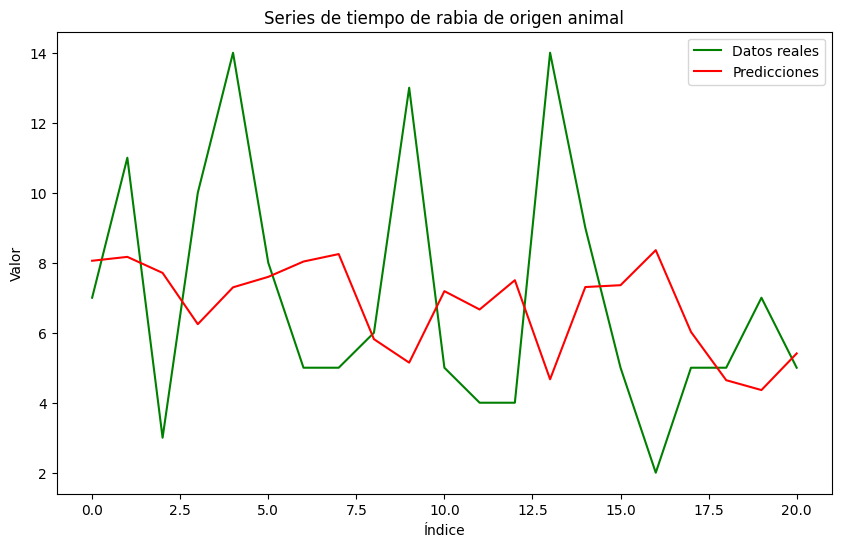

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

# Función para crear y entrenar el modelo
def create_and_train_model(X_train, y_train, X_test, y_test,
                           units=16, dropout_rate=0.25,
                           epochs=100, batch_size=1):
    # Crear el modelo
    model = Sequential()

    # Aplanar la entrada
    model.add(Dense(units, activation='relu', input_shape=(X_train.shape[1] * X_train.shape[2],)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Configurar Early Stopping
    early_stopping = EarlyStopping(monitor='loss',  # Usa 'loss' ya que no hay validación
                                   patience=10,
                                   verbose=1,
                                   restore_best_weights=True)

    # Aplanar los datos
    X_train_flat = X_train.reshape((X_train.shape[0], -1))
    X_test_flat = X_test.reshape((X_test.shape[0], -1))

    # Entrenar el modelo y guardar la historia
    history = model.fit(X_train_flat, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=0,
                        callbacks=[early_stopping])

    # Evaluar el modelo en los datos de prueba
    y_pred = model.predict(X_test_flat)
    mse = mean_squared_error(y_test, y_pred)

    return mse, model, history

# Listas de configuraciones a probar
units_list = [16, 32]
dropout_list = [0.25, 0.5]
batch_size_list = [1, 2]
epochs_list = [100, 200]

# Almacenar los resultados
best_mse = float('inf')
best_model = None
best_config = {}
history_dict = {}

# Iterar sobre las configuraciones
for units in units_list:
    for dropout_rate in dropout_list:
        for batch_size in batch_size_list:
            for epochs in epochs_list:
                mse, model, history = create_and_train_model(X_train, y_train, X_test, y_test,
                                                             units=units, dropout_rate=dropout_rate,
                                                             epochs=epochs, batch_size=batch_size)

                # Comparar MSE y guardar la mejor configuración
                if mse < best_mse:
                    best_mse = mse
                    best_model = model
                    best_config = {
                        'units': units,
                        'dropout_rate': dropout_rate,
                        'batch_size': batch_size,
                        'epochs': epochs
                    }

                # Guardar la historia para graficar
                history_dict[f"units={units}, dropout={dropout_rate}, batch_size={batch_size}, epochs={epochs}"] = history.history

print(f"Mejor configuración: {best_config}")
print(f"MSE en datos de prueba: {best_mse}")

# Aplanar los datos para el mejor modelo
X_test_flat = X_test.reshape((X_test.shape[0], -1))

# Evaluar el mejor modelo
test_loss = best_model.evaluate(X_test_flat, y_test)
print(f"Mejor modelo - Pérdida en test: {test_loss}")

# Generar predicciones con el mejor modelo
y_pred = best_model.predict(X_test_flat)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Datos reales', color='green')
plt.plot(y_pred, label='Predicciones', color='red')
plt.legend()
plt.title('Series de tiempo de rabia de origen animal')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 16.2070
Mejor modelo - Pérdida en test: 16.20699691772461
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


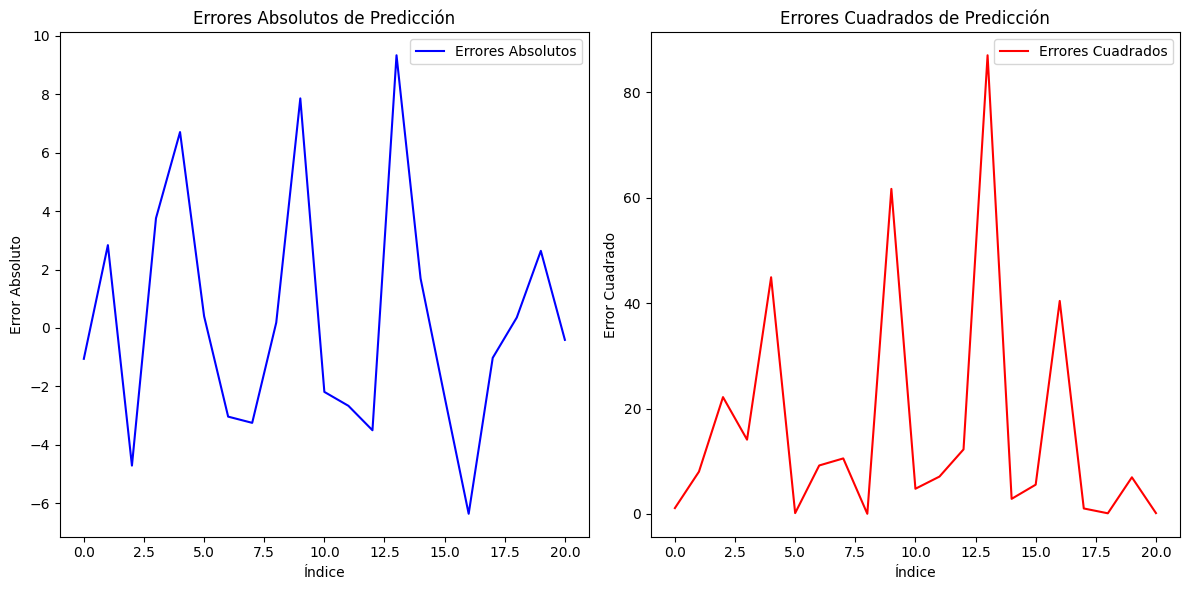

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Aplanar los datos para el mejor modelo
X_test_flat = X_test.reshape((X_test.shape[0], -1))

# Evaluar el mejor modelo
test_loss = best_model.evaluate(X_test_flat, y_test)
print(f"Mejor modelo - Pérdida en test: {test_loss}")

# Generar predicciones con el mejor modelo
y_pred = best_model.predict(X_test_flat)

# Calcular los errores
errors = y_test.flatten() - y_pred.flatten()  # Errores absolutos
squared_errors = errors ** 2  # Errores cuadrados

# Graficar los errores
plt.figure(figsize=(12, 6))

# Error absoluto
plt.subplot(1, 2, 1)
plt.plot(errors, label='Errores Absolutos', color='blue')
plt.xlabel('Índice')
plt.ylabel('Error Absoluto')
plt.title('Errores Absolutos de Predicción')
plt.legend()

# Error cuadrado
plt.subplot(1, 2, 2)
plt.plot(squared_errors, label='Errores Cuadrados', color='red')
plt.xlabel('Índice')
plt.ylabel('Error Cuadrado')
plt.title('Errores Cuadrados de Predicción')
plt.legend()

plt.tight_layout()
plt.show()
